In [1]:
import onc
import helpers_hypoxic_1 as my_functions

import pandas as pd
from functools import reduce # used for dataframes

import os
# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")


In [2]:
#TODO: test the helpers hyp 1 to see if you can generate the df you need for 2021 and 2023 notebooks on deepnote: goal create a clean fucntion that takes location code and prop codes mouldaerly creates the df for a location- want to be able to use for all my plots

# 2023 - CTD -> plotting fucntion needs:
# 2021 - hypoixc -> plotting fuctnion needs:

In [3]:
deep_properties = ["oxygen", "salinity", "conductivity", "seawatertemperature", "density"]
pinnacle_properties = ["oxygen", "parphotonbased", "chlorophyll", "salinity", "turbidityntu", "conductivity", "seawatertemperature", "density"]

## Plotting One Year of Data

In [4]:
# Entire year
start_21 = "2021-01-01T00:00:00.000Z"
start_22 = "2022-01-01T00:00:00.000Z"

In [5]:
# fetch dataframe of properties data for each time frame
deep_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode="FGPD", propertyCodes=deep_properties, resample=1800, updates=True)
pin_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode="FGPPN", propertyCodes=pinnacle_properties, resample=1800)

API Request: getScalarData{'locationCode': 'FGPD.O2', 'deviceCategoryCode': 'OXYSENSOR', 'propertyCode': 'oxygen', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg', 'sensorCategoryCodes': 'oxygen_corrected'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': 'salinity', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': 'conductivity', 'dateFrom': '2021-01-01T00:00:00.000Z', 'dateTo': '2022-01-01T00:00:00.000Z', 'metadata': 'minimum', 'qualityControl': 'clean', 'resamplePeriod': 1800, 'resampleType': 'avg'}
API Request: getScalarData{'locationCode': 'FGPD', 'deviceCategoryCode': 'CTD', 'propertyCode': '

In [6]:
print(deep_yr_21_indicators.head(3))

                           Oxygen (ml/l)  Salinity (psu)  Conductivity (S/m)  \
Time                                                                           
2021-01-01 00:15:00+00:00            NaN       31.837662            3.447278   
2021-01-01 00:45:00+00:00            NaN       31.837139            3.446709   
2021-01-01 01:15:00+00:00            NaN       31.831736            3.446169   

                           Temperature (°C)  Density (kg/m3)  
Time                                                          
2021-01-01 00:15:00+00:00          9.368090      1025.020570  
2021-01-01 00:45:00+00:00          9.362289      1025.019496  
2021-01-01 01:15:00+00:00          9.362302      1025.013739  


start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


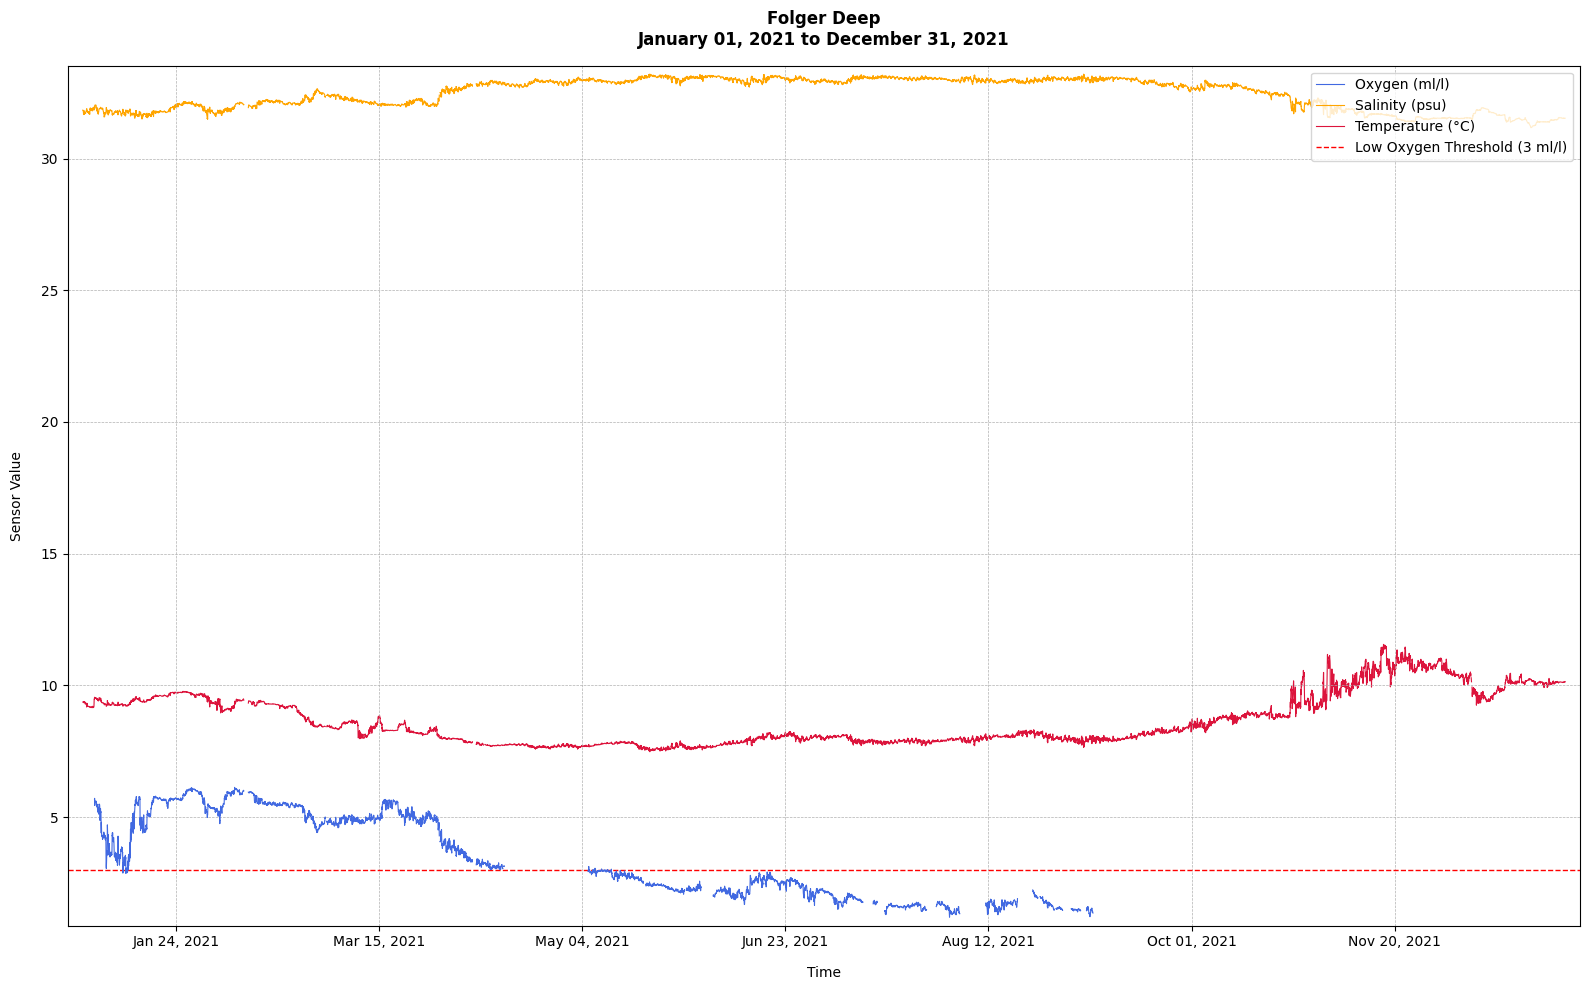

In [7]:
my_functions.plot_dataframe(df=deep_yr_21_indicators[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

start df: 2021-01-01 00:15:00+00:00, end: 2021-12-31 23:45:00+00:00


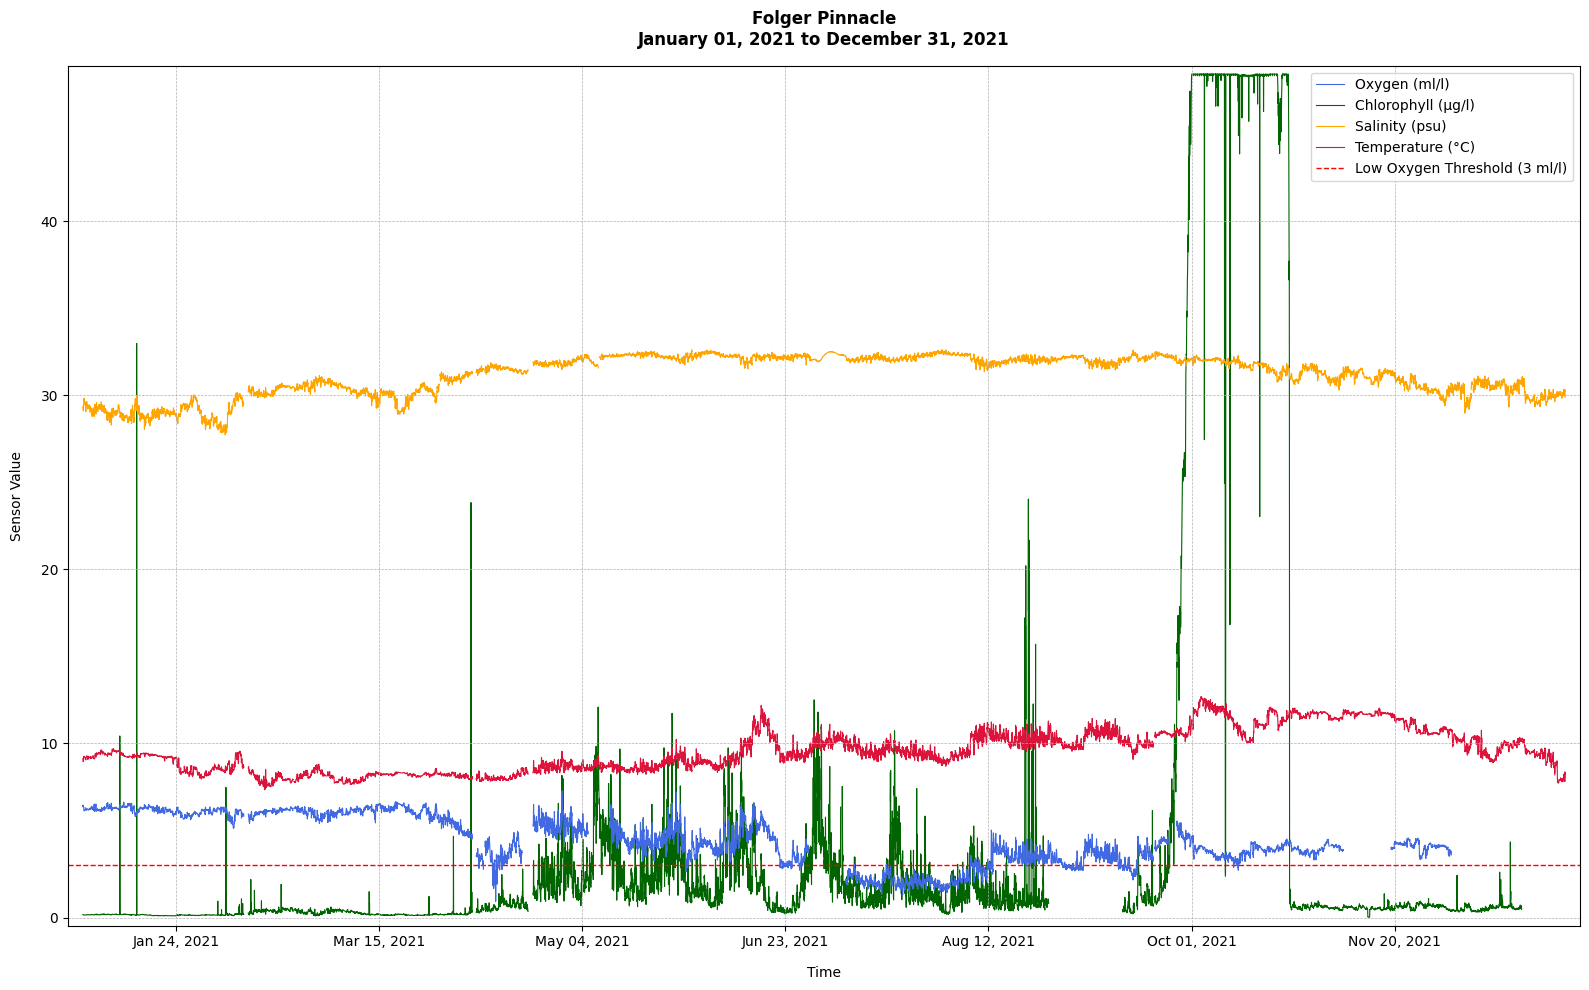

In [8]:
my_functions.plot_dataframe(df=pin_yr_21_indicators[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

## Smaller Time Series

In [9]:
# GETTING SMALLER TIME SERIES FROM OUR ORIGINAL DATAFRAME - limiting API calls

# Season: April through November 2021
apr_21 = "2021-04-01T00:00:00.000Z"
nov_21 = "2021-11-15T00:00:00.000Z"

# Low oxygen: July through August 2021
jul_21 = "2021-07-01T00:00:00.000Z"
aug_21 = "2021-10-01T12:00:00.000Z"

# High chlorophyll: September through November 2021
sept_21 = "2021-09-15T00:00:00.000Z"

# Convert string dates to Timestamps for slicing
apr_21 = pd.to_datetime("2021-04-01T00:00:00.000Z")
nov_21 = pd.to_datetime("2021-11-15T00:00:00.000Z")
jul_21 = pd.to_datetime("2021-07-09T00:00:00.000Z")
aug_21 = pd.to_datetime("2021-08-11T12:00:00.000Z")
sept_21 = pd.to_datetime("2021-09-15T00:00:00.000Z")

# Deep: Slice views of the full-year data
deep_season_df = pin_yr_21_indicators.loc[apr_21:nov_21]
deep_low_ox_df = pin_yr_21_indicators.loc[jul_21:aug_21]
deep_high_chlor_df = pin_yr_21_indicators.loc[sept_21:nov_21]

# Pinnacle: Slice views of the full-year data
pin_season_df = pin_yr_21_indicators.loc[apr_21:nov_21]
pin_low_ox_df = pin_yr_21_indicators.loc[jul_21:aug_21]
pin_high_chlor_df = pin_yr_21_indicators.loc[sept_21:nov_21]

### Seasonal View (April Through November)

start df: 2021-04-01 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


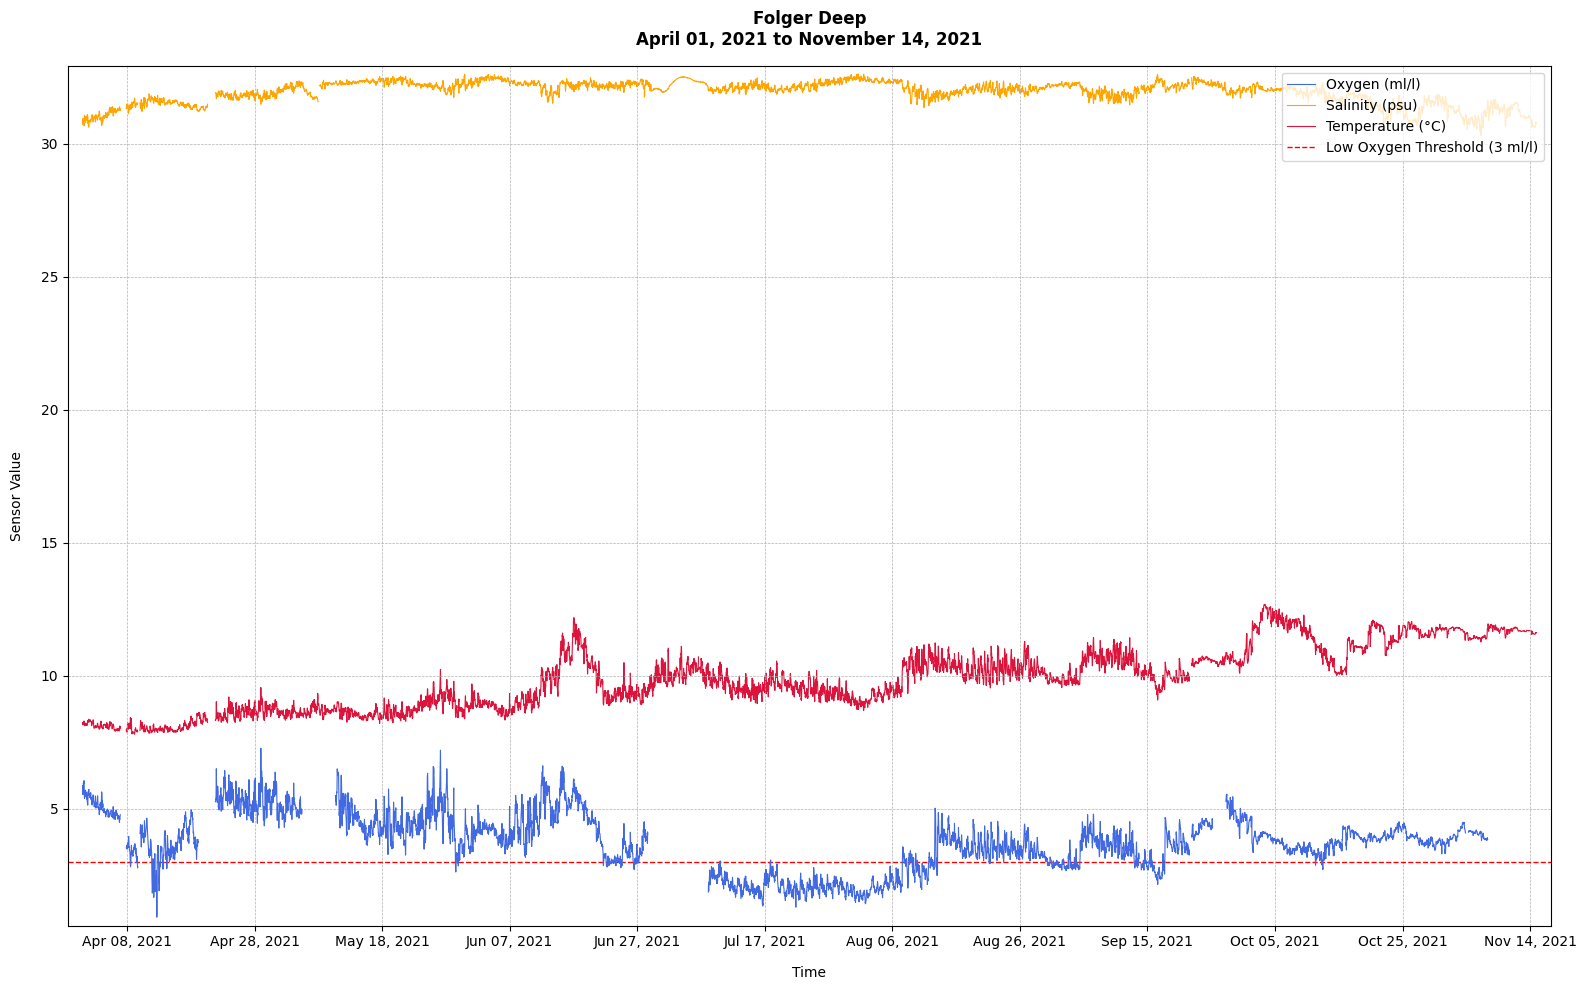

In [10]:
my_functions.plot_dataframe(df=deep_season_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

start df: 2021-04-01 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


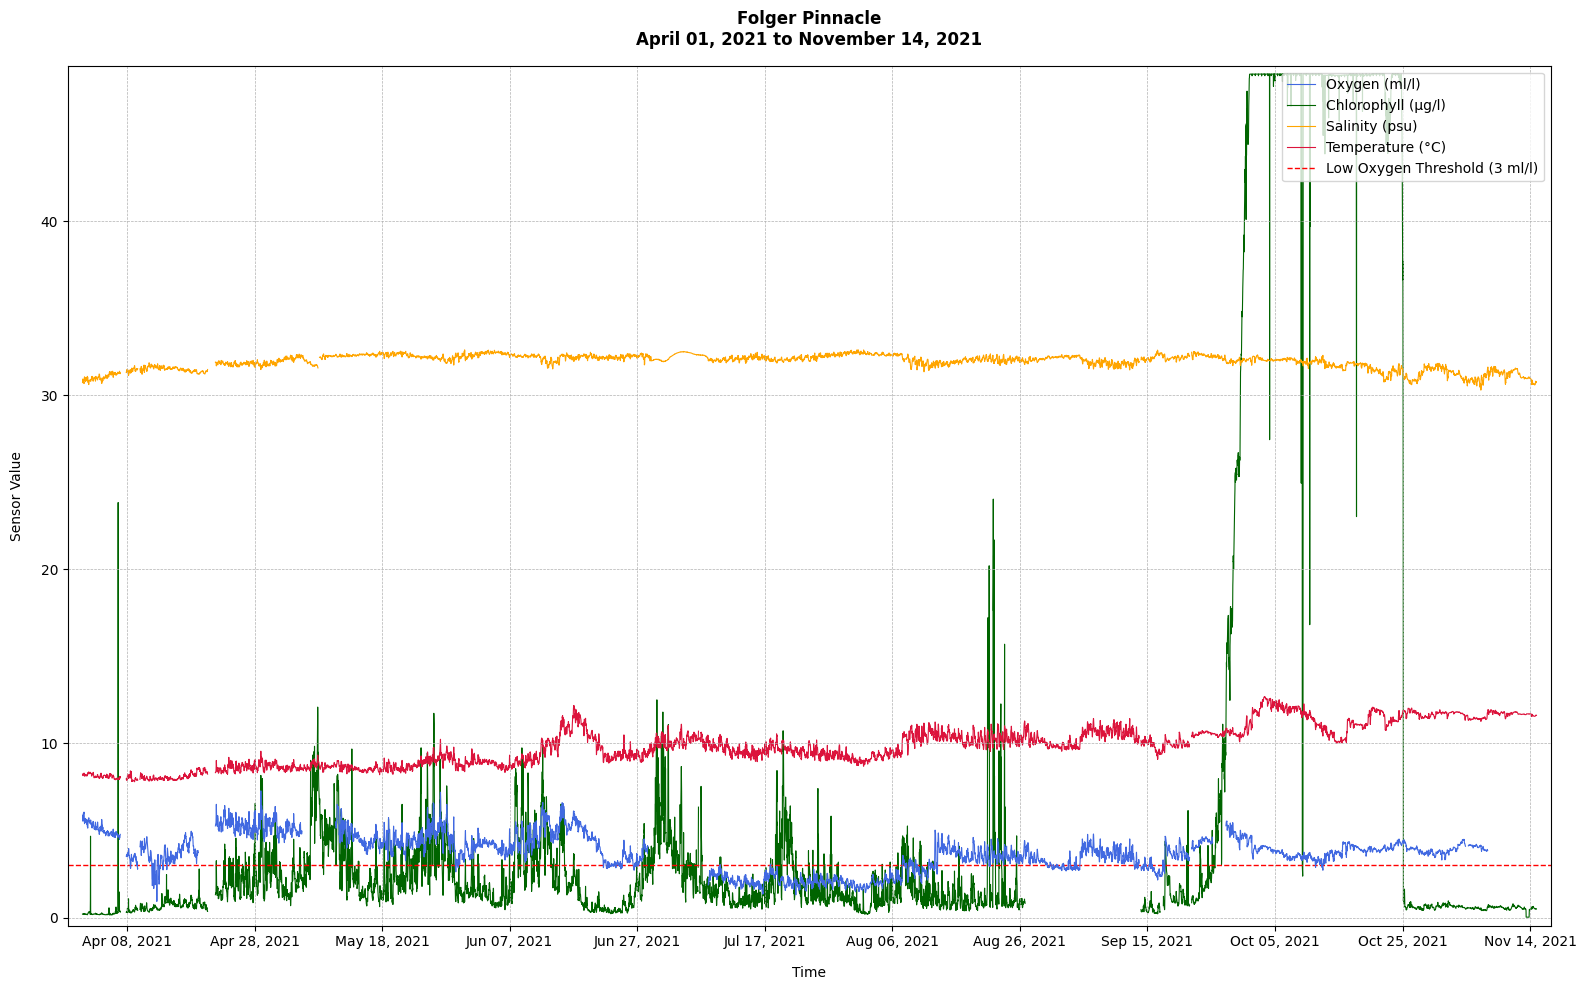

In [11]:
my_functions.plot_dataframe(df=pin_season_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

### Low Oxygen (July through August)

start df: 2021-07-09 00:15:00+00:00, end: 2021-08-11 11:45:00+00:00


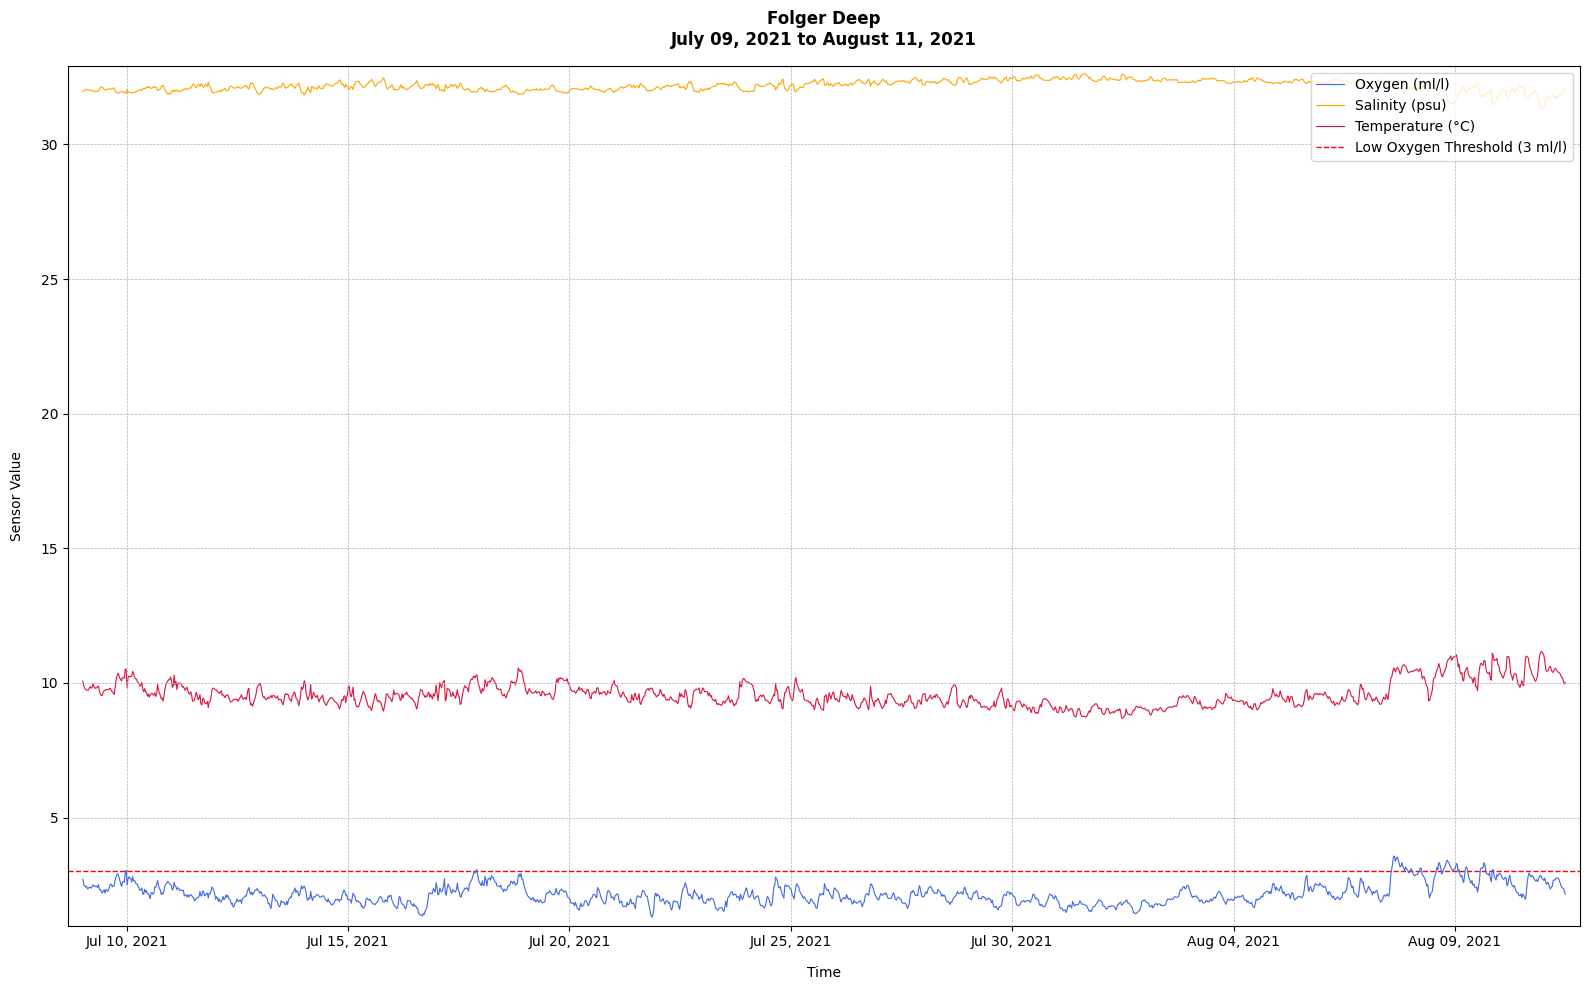

In [12]:
my_functions.plot_dataframe(df=deep_low_ox_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

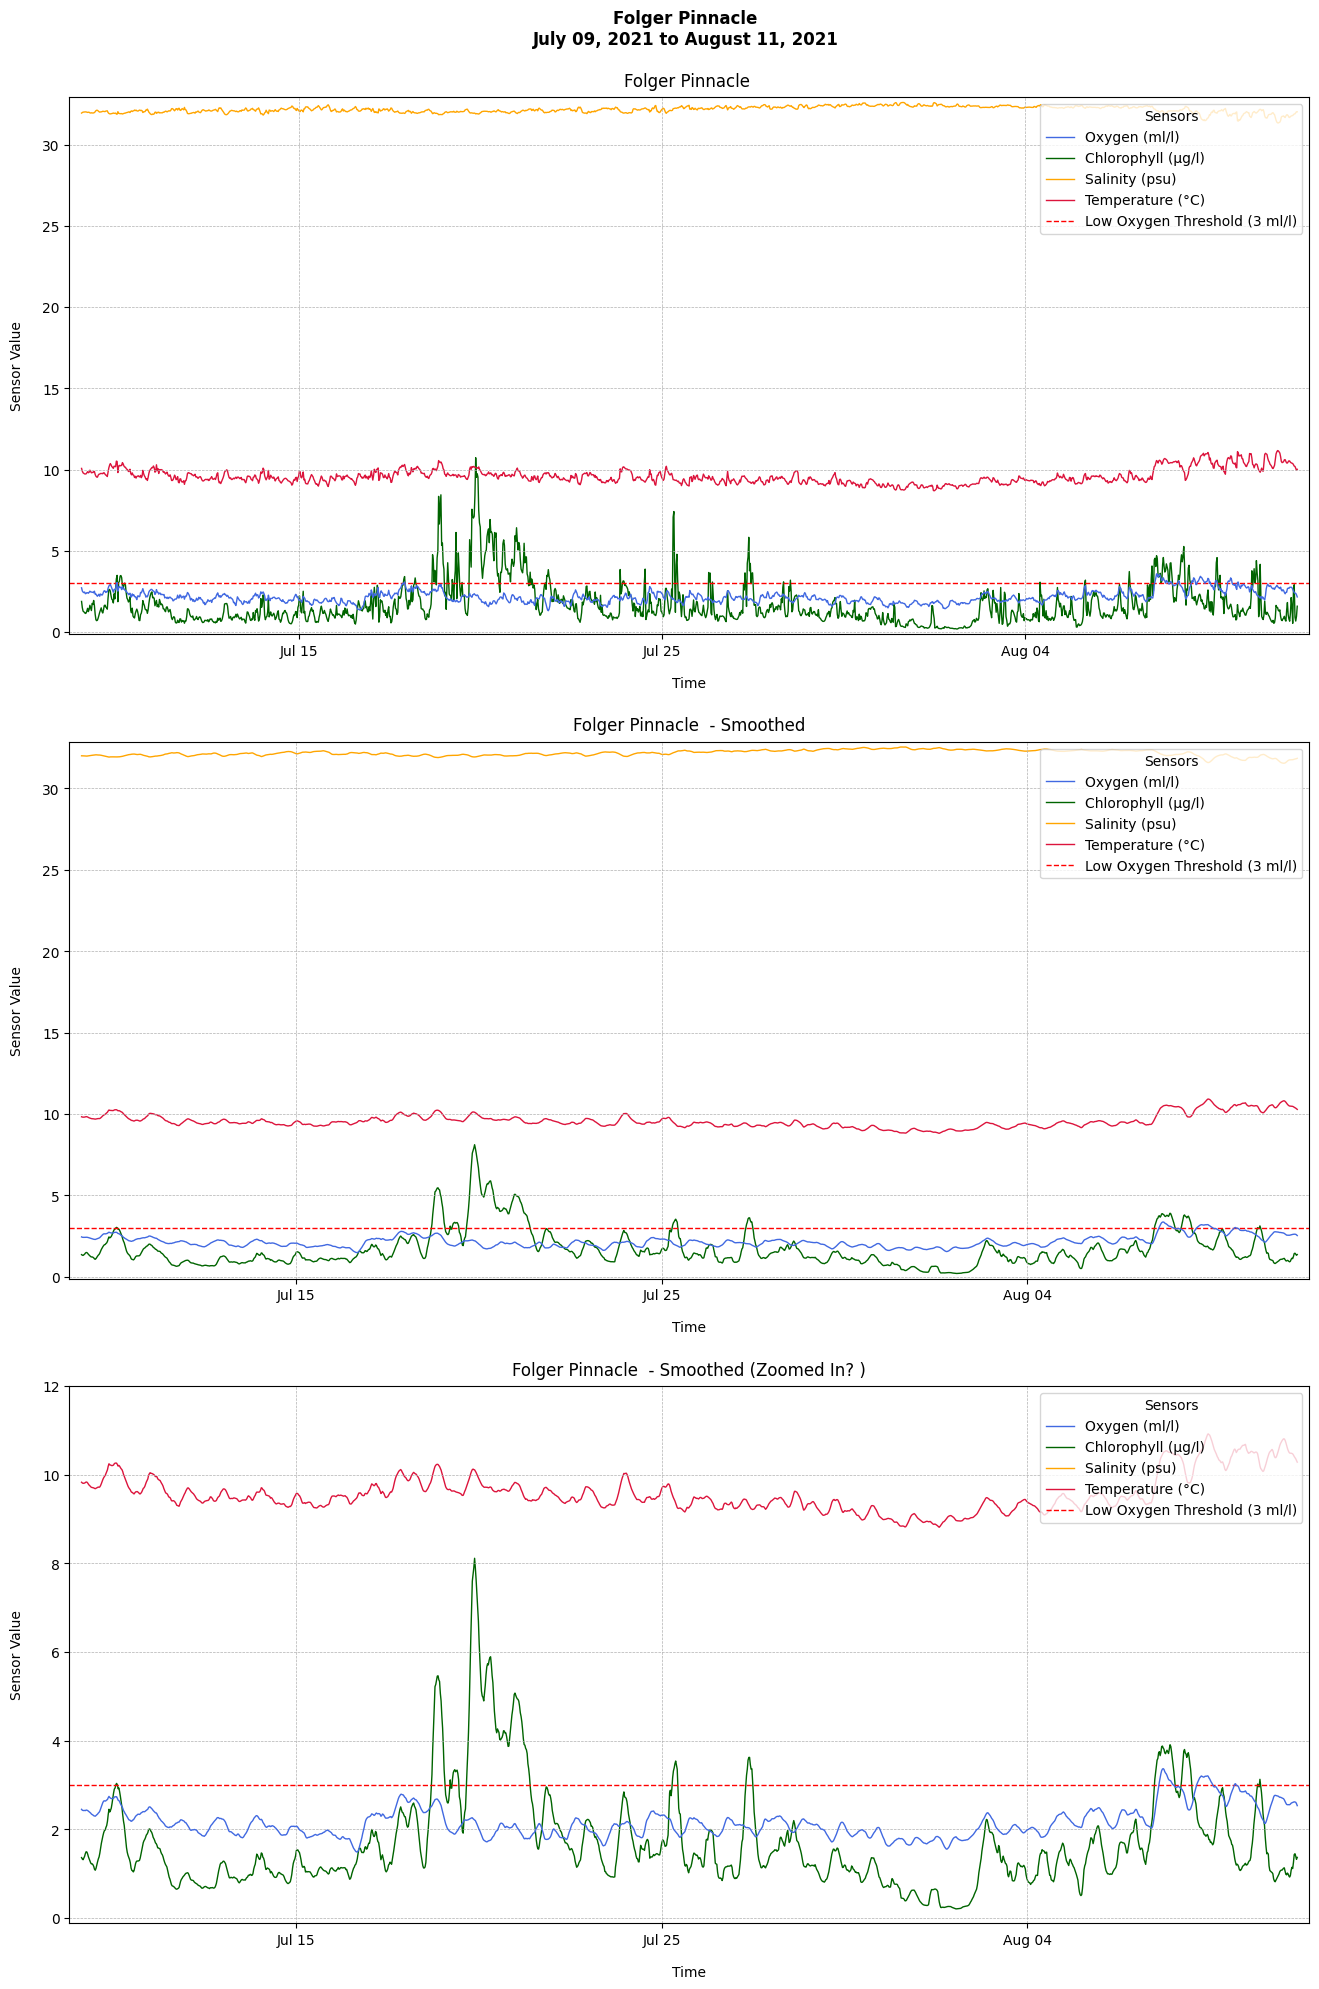

In [13]:
my_functions.plot_dataframe_norm_and_scale(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN", ymax=12)

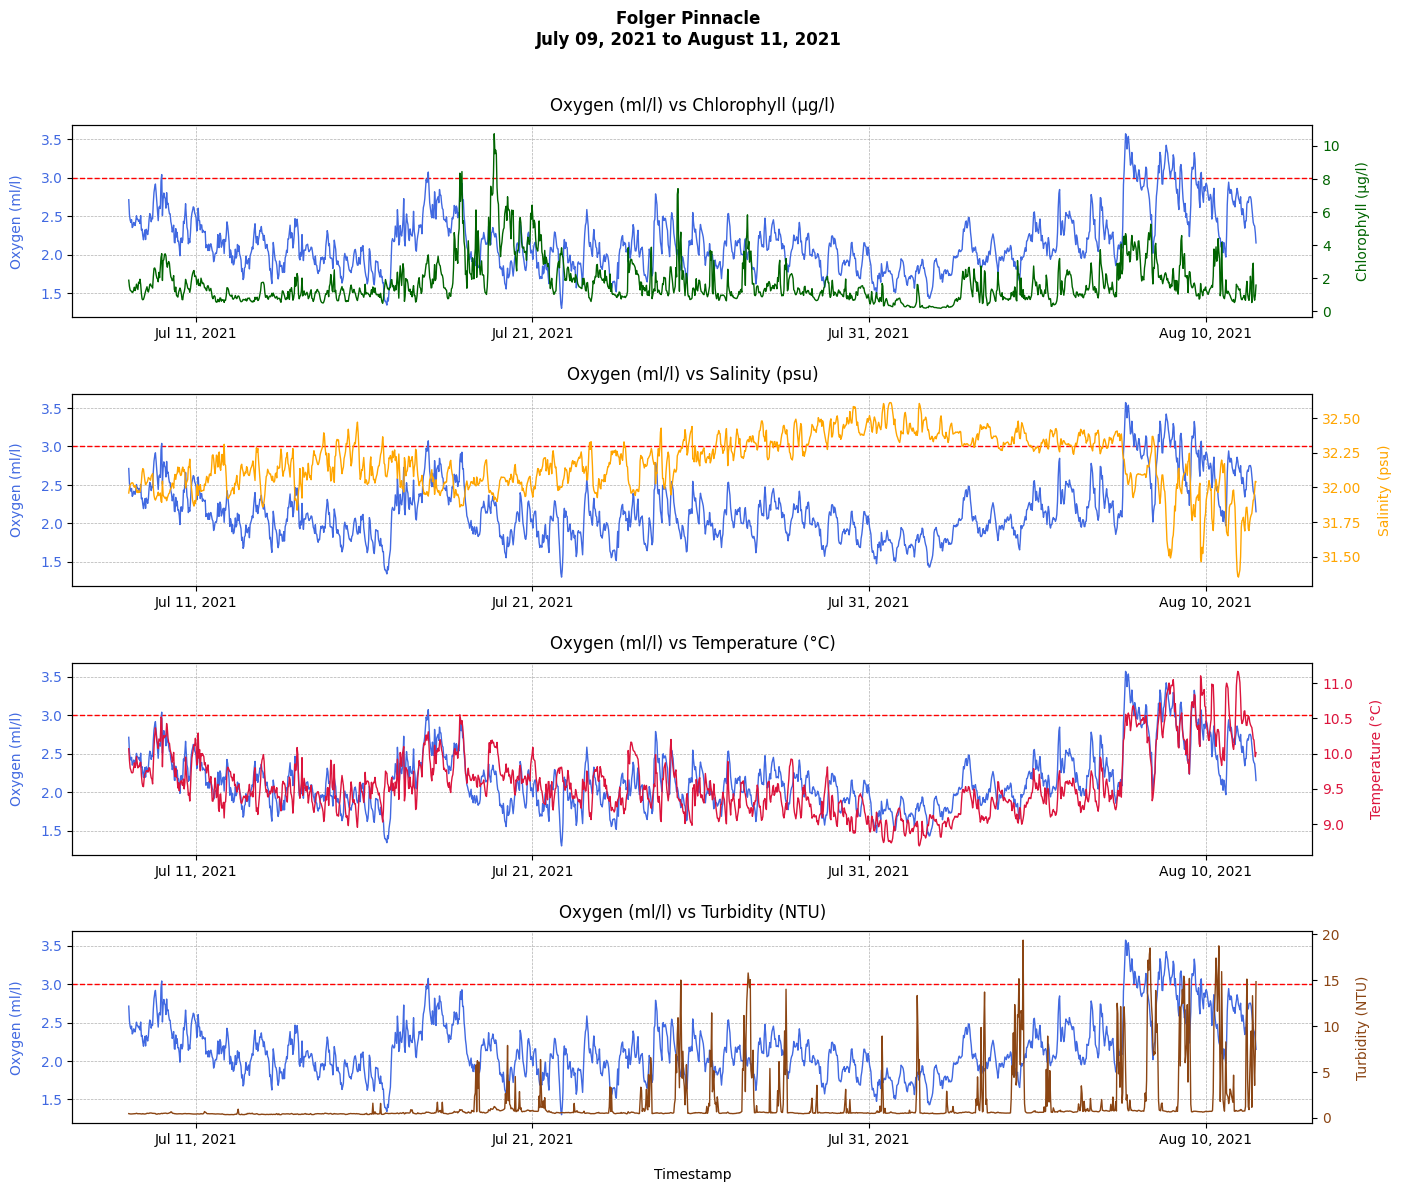

In [14]:
my_functions.subplot_all_with_oxygen(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)", "Turbidity (NTU)"]], locationCode="FGPPN")

### High Chlorophyll

start df: 2021-09-15 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


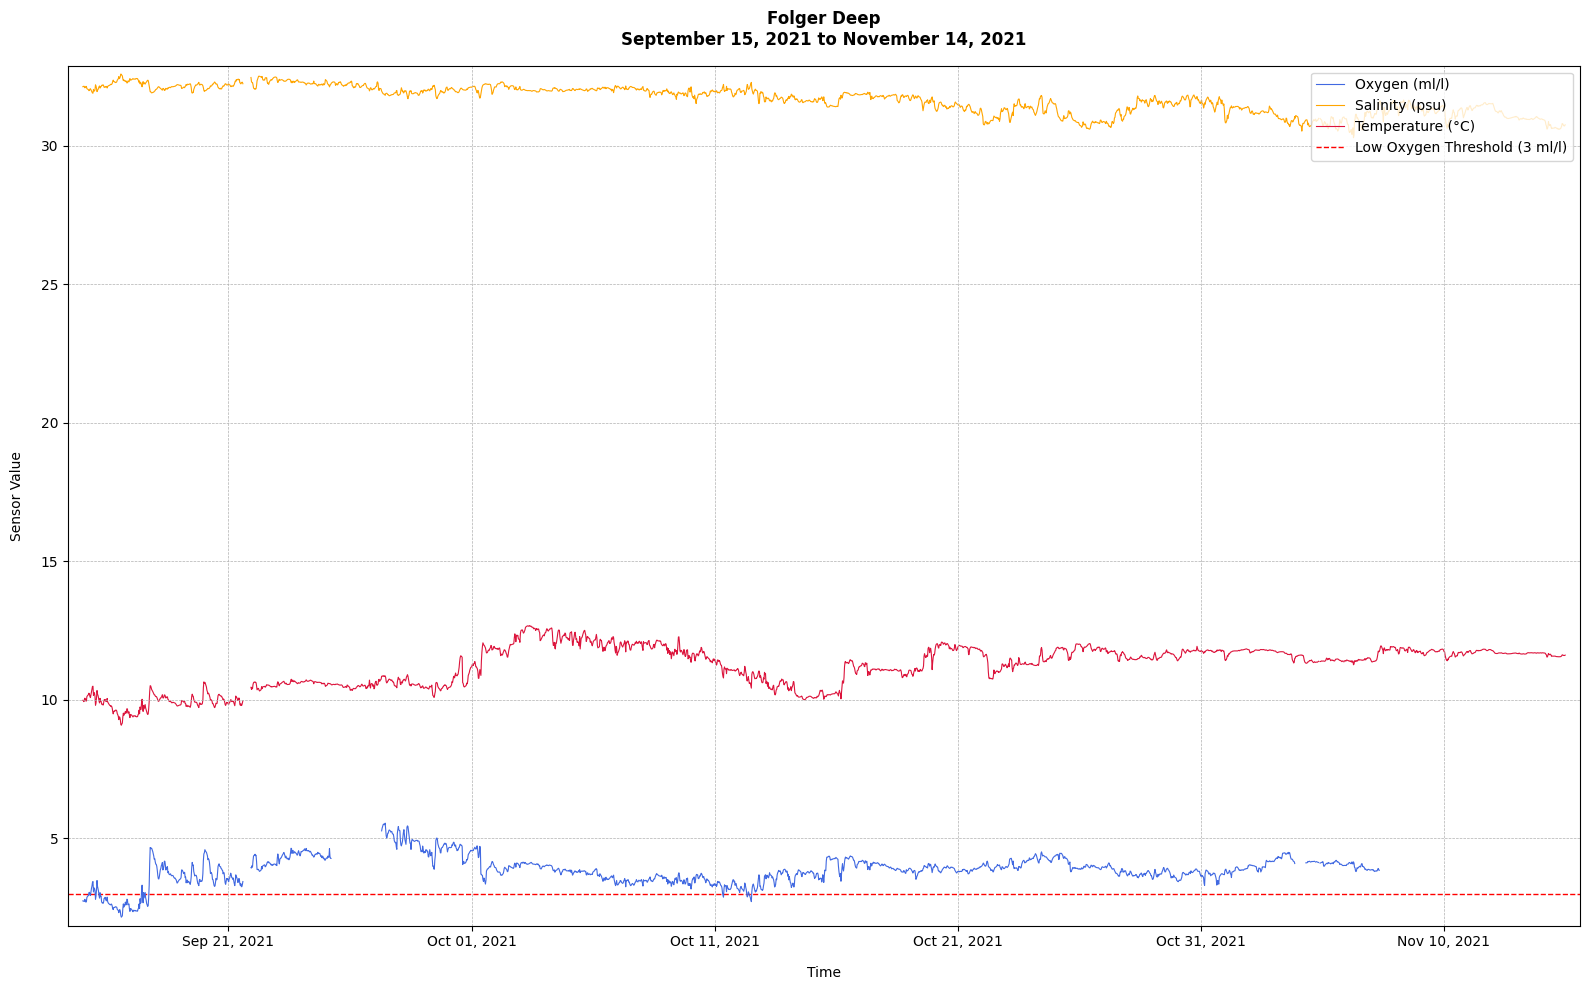

In [15]:
my_functions.plot_dataframe(df=deep_high_chlor_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

start df: 2021-09-15 00:15:00+00:00, end: 2021-11-14 23:45:00+00:00


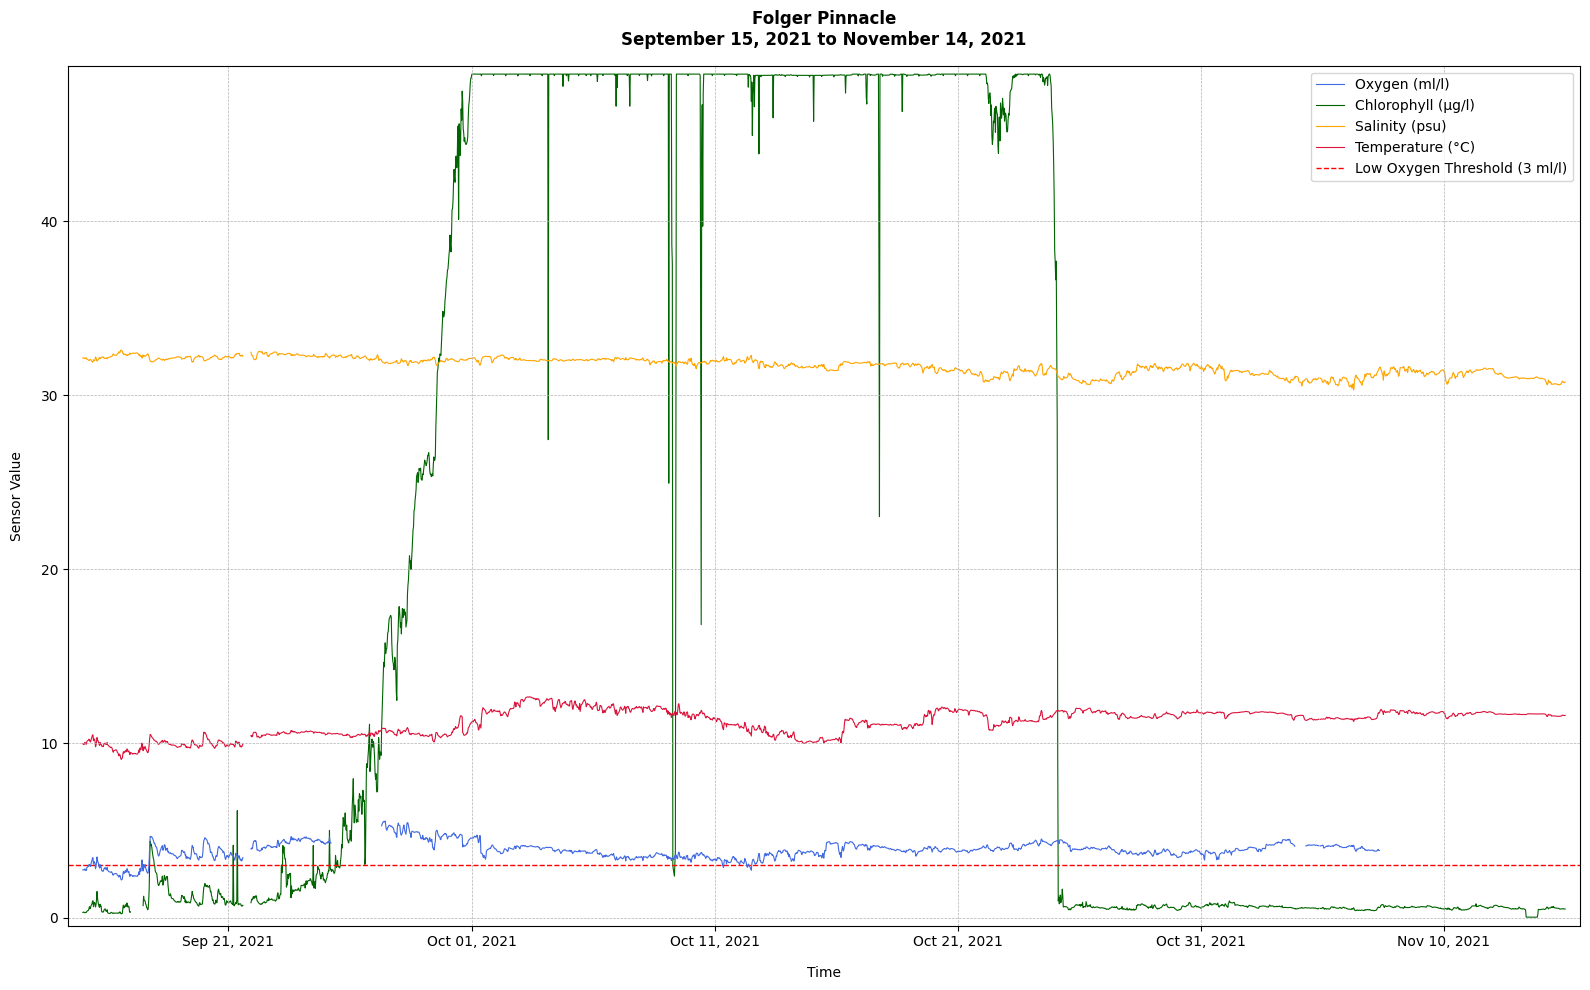

In [16]:
my_functions.plot_dataframe(df=pin_high_chlor_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")